In [59]:
#Loading the libraries
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import math
import numpy
import PIL
import pandas as pd
from PIL import Image

In [2]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import InputLayer, Input
from tensorflow.python.keras.layers import Reshape, MaxPooling2D
from tensorflow.python.keras.layers import Conv2D, Dense, Flatten

In [3]:
tf.keras.__version__

'2.0.8-tf'

In [15]:
#Working Directory
import os
#For Train Images
os.chdir("/Users/pratham/Desktop/ML:DL Practice/Age Detection/train_DETg9GD/Train")

In [7]:
#for train data
os.chdir("/Users/pratham/Desktop/ML:DL Practice/Age Detection/train_DETg9GD")
train = pd.read_csv("Train.csv")

In [10]:
np.shape(train)

(19906, 2)

In [11]:
train.head(5)

,ID,Class
0,377.jpg,MIDDLE
1,17814.jpg,YOUNG
2,21283.jpg,MIDDLE
3,16496.jpg,YOUNG
4,4487.jpg,MIDDLE


In [35]:
#For test data
os.chdir("/Users/pratham/Desktop/ML:DL Practice/Age Detection/test_Bh8pGW3")
test = pd.read_csv("Test.csv")

In [12]:
np.shape(test)

(6636, 1)

In [16]:
#load all the train images in a list
relevant_path = "/Users/pratham/Desktop/ML:DL Practice/Age Detection/train_DETg9GD/Train"
included_extensions = ['jpg', 'bmp', 'png', 'gif']
file_names = [fn for fn in os.listdir(relevant_path)
              if any(fn.endswith(ext) for ext in included_extensions)]

In [29]:
import matplotlib.image as mpimg

In [30]:
imgTrain = []
for i in range(len(file_names)):
    imgTrain.append(mpimg.imread(file_names[i]))

In [32]:
#load all the test images in a list
relevant_path = "/Users/pratham/Desktop/ML:DL Practice/Age Detection/test_Bh8pGW3/Test"
included_extensions = ['jpg', 'bmp', 'png', 'gif']
file_names = [fn for fn in os.listdir(relevant_path)
              if any(fn.endswith(ext) for ext in included_extensions)]

In [37]:
os.chdir("/Users/pratham/Desktop/ML:DL Practice/Age Detection/test_Bh8pGW3/Test")

In [38]:
imgTest = []
for i in range(len(file_names)):
    imgTest.append(mpimg.imread(file_names[i]))

In [100]:
type(imgTest)

list

In [45]:
train_label = train['Class']

In [47]:
#Label Encoding
train_label = train_label.map({'YOUNG': 0, 'MIDDLE': 1, 'OLD': 2})

In [50]:
np.unique(train_label)

array([0, 1, 2])

In [52]:
from sklearn.preprocessing import LabelBinarizer 
label_binarizer = LabelBinarizer()
label_binarizer.fit(train_label) # need to be global or remembered to use it later

def one_hot_encode(x):
    """
    One hot encode a list of sample labels. Return a one-hot encoded vector for each label.
    : x: List of sample Labels
    : return: Numpy array of one-hot encoded labels
    """
    return label_binarizer.transform(x)

In [54]:
train_label = one_hot_encode(train_label)

In [58]:
train_label = np.float32(train_label)
print(train_label[:4])

[[ 0.  1.  0.]
 [ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 1.  0.  0.]]


In [63]:
type(train_label)

numpy.ndarray

In [60]:
train.cls =train['Class']

In [62]:
train.cls[:4]

0    MIDDLE
1     YOUNG
2    MIDDLE
3     YOUNG
Name: Class, dtype: object

In [73]:
# We know that Age Detection images are 28 pixels in each dimension.
img_size = 28

# Images are stored in one-dimensional arrays of this length.
img_size_flat = img_size * img_size

# Tuple with height and width of images used to reshape arrays.
# This is used for plotting the images.
img_shape = (img_size, img_size)

# Tuple with height, width and depth used to reshape arrays.
# This is used for reshaping in Keras.
img_shape_full = (img_size, img_size, 1)

# Number of colour channels for the images: 1 channel for gray-scale.
num_channels = 1

# Number of classes, one class for each of 10 digits.
num_classes = 3

In [74]:
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9
    
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape(img_shape), cmap='binary')

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

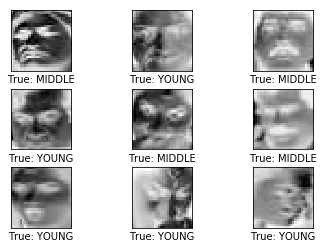

In [75]:
# Get the first images from the train-set.
images = imgTrain[0:9]

# Get the true classes for those images.
cls_true = train.cls[0:9]

# Plot the images and labels using our helper-function above.
plot_images(images=images, cls_true=cls_true)

In [80]:
type(imgTrain)
print len(imgTrain)

19906


In [81]:
pngTrain = np.array(imgTrain)

In [86]:
#Converting train data Images list into normalised array
arrTrain = []
for i in range(len(imgTrain)):
    arrTrain.append(list(imgTrain[i].flatten()))
    arrTrain
    
arrTrain = np.array(arrTrain)

In [101]:
#Converting test data Images list into normalised array
arrTest = []
for i in range(len(imgTest)):
    arrTest.append(list(imgTest[i].flatten()))
    
arrTest = np.array(arrTest)

In [96]:
arrTrain.shape

(19906, 784)

In [102]:
arrTest.shape

(6636, 784)

In [76]:
#Sequential Model- Keras
# Start construction of the Keras Sequential model.
model = Sequential()

# Add an input layer which is similar to a feed_dict in TensorFlow.
# Note that the input-shape must be a tuple containing the image-size.
model.add(InputLayer(input_shape=(img_size_flat,)))

# The input is a flattened array with 784 elements,
# but the convolutional layers expect images with shape (28, 28, 1)
model.add(Reshape(img_shape_full))

# First convolutional layer with ReLU-activation and max-pooling.
model.add(Conv2D(kernel_size=5, strides=1, filters=16, padding='same',
                 activation='relu', name='layer_conv1'))
model.add(MaxPooling2D(pool_size=2, strides=2))

# Second convolutional layer with ReLU-activation and max-pooling.
model.add(Conv2D(kernel_size=5, strides=1, filters=36, padding='same',
                 activation='relu', name='layer_conv2'))
model.add(MaxPooling2D(pool_size=2, strides=2))

# Flatten the 4-rank output of the convolutional layers
# to 2-rank that can be input to a fully-connected / dense layer.
model.add(Flatten())

# First fully-connected / dense layer with ReLU-activation.
model.add(Dense(128, activation='relu'))

# Last fully-connected / dense layer with softmax-activation
# for use in classification.
model.add(Dense(num_classes, activation='softmax'))

In [77]:
#Model Compilation

from tensorflow.python.keras.optimizers import Adam

optimizer = Adam(lr=1e-3)

In [78]:
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [99]:
model.fit(x=arrTrain,
          y=train_label,
          epochs=1, batch_size=128)

Epoch 1/1
19906/19906 [==============================] - 30s - loss: 7.3700 - acc: 0.5428    


In [103]:
#Prediction
y_pred = model.predict(x = arrTest)

In [104]:
y_pred[0:4]

array([[ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.]], dtype=float32)

In [129]:
cls_pred = np.argmax(y_pred,axis=1)

In [143]:
cls_pred
dic = {0: 'YOUNG', 1: 'MIDDLE', 2: 'OLD'}

In [149]:
#Convert test predictions into true categories
test_cls = [dic[x] for x in cls_pred]
test_cls[:4]

['MIDDLE', 'MIDDLE', 'MIDDLE', 'MIDDLE']

In [150]:
sub = pd.DataFrame({
    "Class": test_cls,
    "ID": test['ID']
})

In [151]:
sub.to_csv("submissionAgeDetection.csv", index=False)